# BIOS512 Assignment #4

🌬 For this assignment we are going to work with [Canada wind turbine](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/readme.md) data from TidyTuesday. 💨

Use `read_csv` to load the data from the TidyTuesday GitHub repository. The project URL is can be found at [https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/).

In [20]:
library ('tidyverse')

wind_turbine <- readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-10-27/wind-turbine.csv') |> group_by(province_territory)
wind_turbine |> head()

Rows: 6698 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): province_territory, project_name, turbine_identifier, turbine_numbe...
dbl (7): objectid, total_project_capacity_mw, turbine_rated_capacity_k_w, ro...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


objectid,province_territory,project_name,total_project_capacity_mw,turbine_identifier,turbine_number_in_project,turbine_rated_capacity_k_w,rotor_diameter_m,hub_height_m,manufacturer,model,commissioning_date,latitude,longitude,notes
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,Alberta,Optimist Wind Energy,0.90,OWE1,1/2,150,23,30,Bonus,AN 150/30,1993,49.52535,-114.0548,NA
2,Alberta,Castle River Wind Farm,44.00,CRW1,1/60,600,44,40,Vestas,V44/600,1997,49.51264,-114.0357,NA
3,Alberta,Waterton Wind Turbines,3.78,WWT1,1/6,600,44,50,Vestas,V44/600,1998,49.23307,-113.6549,NA
4,Alberta,Waterton Wind Turbines,3.78,WWT2,2/6,600,44,50,Vestas,V44/600,1998,49.23303,-113.6302,NA
5,Alberta,Waterton Wind Turbines,3.78,WWT3,3/6,600,44,50,Vestas,V44/600,1998,49.21755,-113.6802,NA
6,Alberta,Waterton Wind Turbines,3.78,WWT4,4/6,660,47,50,Vestas,V47/660,2000,49.21773,-113.6579,NA


Each row in the table represents a single turbine.

Make a bar chart 📊 **sorted by frequency** of turbine count per province territory. (Hint: `fct_infreq` will sort your factor levels by frequency for subsequent plotting)

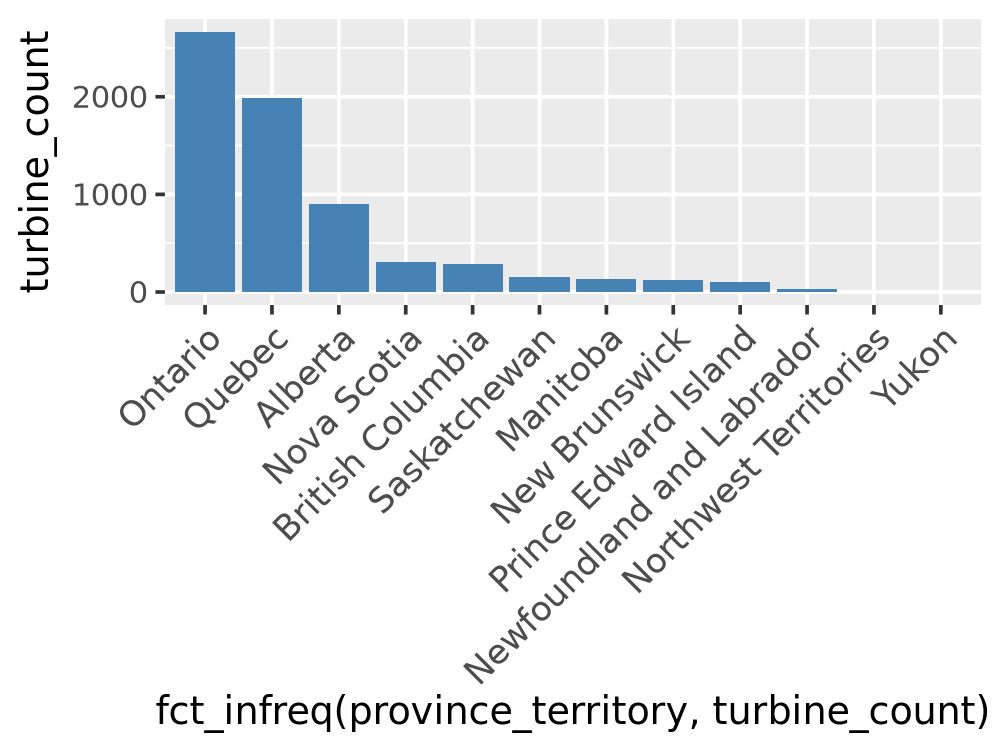

In [37]:
turbine_per_province <- wind_turbine %>%
  count(province_territory, name = "turbine_count")

ggplot(turbine_per_province, aes(x = fct_infreq(province_territory, turbine_count), y = turbine_count)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 10))

Make a bar chart **sorted by frequency** of turbine count per manufacturer. **Group the low frequency manufacturers into an `Other` category**.

**Bonus:** Can you force the `Other` category to be the last bar? 

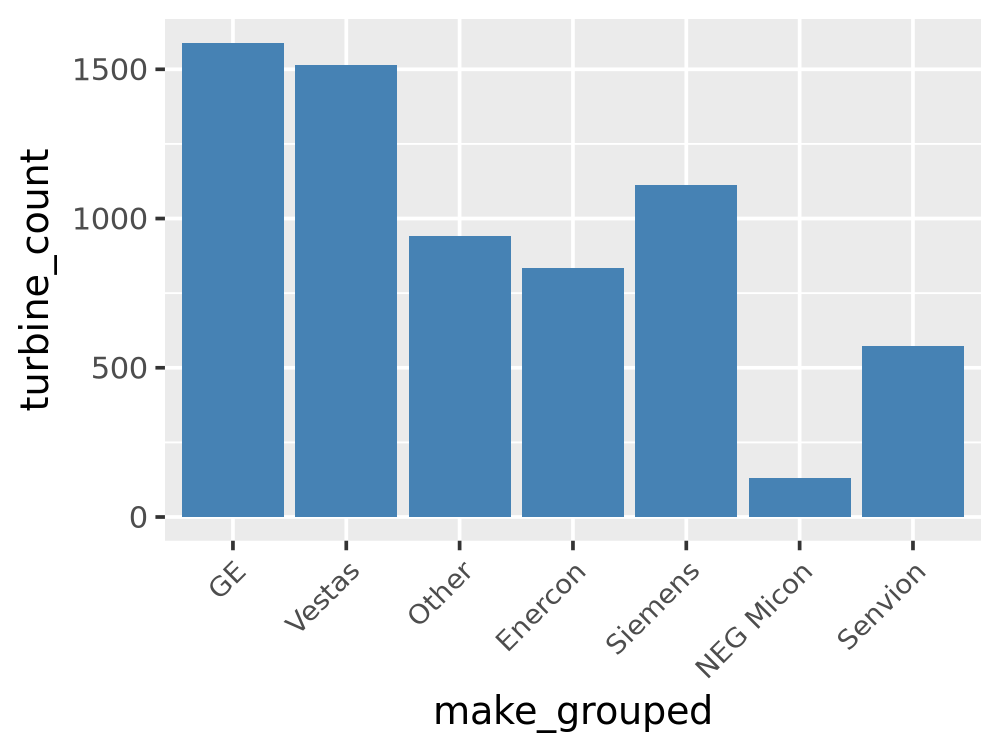

In [67]:
turbine_per_make <- wind_turbine %>%
  count(manufacturer, name = "turbine_count") %>%
  mutate(make_grouped = ifelse(turbine_count < 100, "Other", as.character(manufacturer)))

turbine_per_make_GROUP <- turbine_per_make %>%
  count(make_grouped, wt = turbine_count, name = "turbine_count")

turbine_per_make_GROUP <- turbine_per_make_GROUP %>%
  mutate(make_grouped = fct_infreq(make_grouped) %>% 
         fct_relevel("Other", after = Inf))

ggplot(turbine_per_make_GROUP, aes(x = make_grouped, y = turbine_count)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 8))

# I couldn't figure out the Other bit; you can see I tried it with fct_relevel but that didn't work as expected for some reason.

Let's make a map of where each turbine is located. 🗺️

In the cell below ⬇️ load the `mapdata` package.

In [68]:
library(mapdata)

Now we can retrieve the "data" for a map of Canada. Run this code:

In [71]:
canada = map_data('world', region='Canada') 

Are the column names for `latitude` and `longitude` the same for your Canada map data and the turbine data?

A: **Yes, they are.**

The code below creates a map of Canada. Modify the code to add the turbine locations. 

❗️ **Hint:** use `geom_point`. Remember to, 
1. define encodings inside of `geom_point` that work for the **turbine data**, and
2. to override the data in `geom_point` to use the **turbine data** instead of the **Canada map data**. ❗️

[This](https://github.com/chuckpr/BIOS512/blob/main/assignments/2024/map.png?raw=true) is what the map should look like...

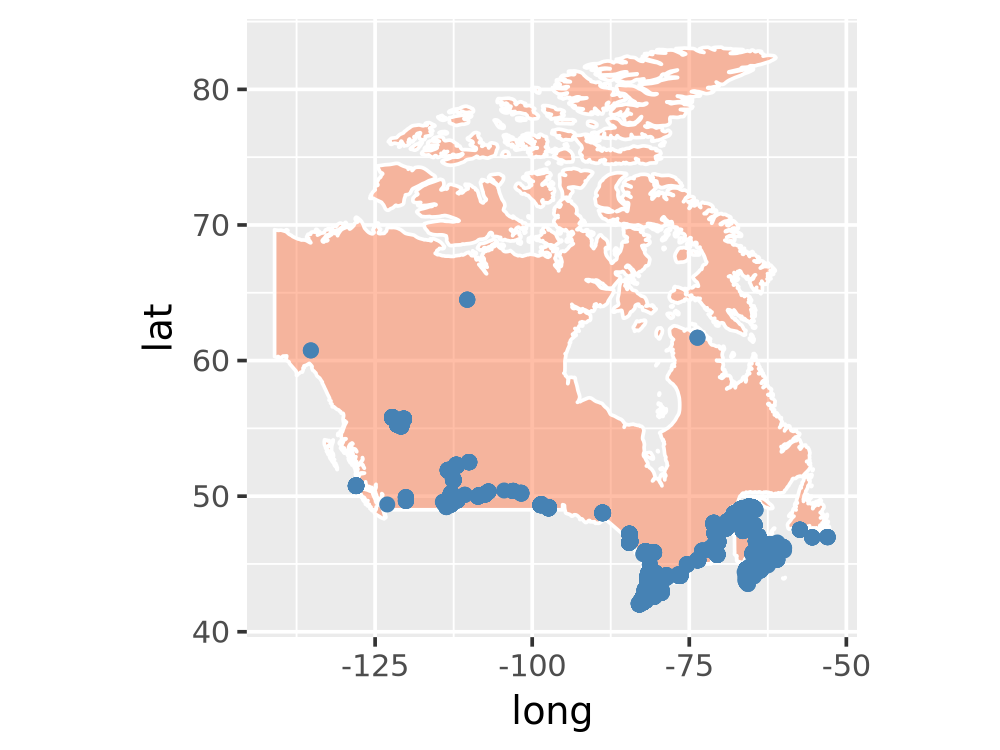

In [75]:
ggplot(data = canada) + 
    geom_polygon(aes(x = long, y = lat, group = group), fill = 'coral', color = "white", alpha = 0.5) + 
    coord_quickmap() +
    geom_point(data = wind_turbine, aes(x=longitude, y=latitude), color="steelblue")